## Name: Chirag suryakant patole
## Matriculation Nr. 24220357
## Topic - Data analysis and visualization on Videogames dataset.

## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
pd.set_option('display.max_columns', None)

import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno

from sklearn.preprocessing import StandardScaler
from scipy import stats


In [2]:
data = pd.read_csv('vgsales.csv')

In [3]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
data.shape

(16598, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Their fields and data types are:

Rank - Ranking of overall sales, inger



Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.), object

Year - Year of the game's release, float

Genre - Genre of the game ,object

Publisher - Publisher of the game, object

NA_Sales - Sales in North America (in millions), float

EU_Sales - Sales in Europe (in millions), float

JP_Sales - Sales in Japan (in millions), float

Other_Sales - Sales in the rest of the world (in millions), float

Global_Sales - Total worldwide sales, float

In [6]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
data = data.dropna(subset=['Year', 'Publisher'])

In [8]:
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [9]:
data.shape

(16291, 11)

## Descriptive Analysis

In [10]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [11]:
platform_counts = data['Platform'].value_counts()
genre_counts = data['Genre'].value_counts()
publisher_counts = data['Publisher'].value_counts()

In [12]:
platform_counts 

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [13]:
genre_counts

Genre
Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: count, dtype: int64

In [14]:
publisher_counts

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: count, Length: 576, dtype: int64

## Time Series Analysis

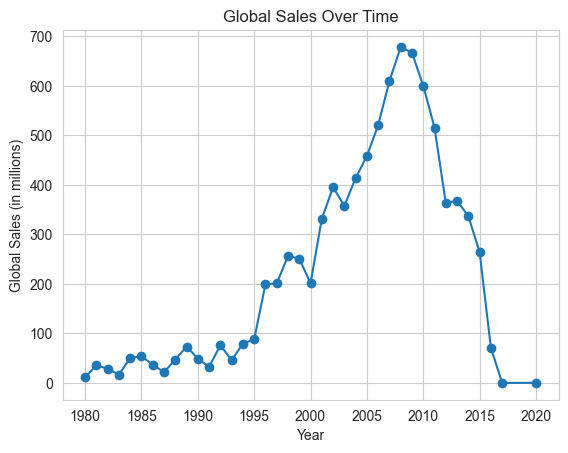

In [15]:
# Finding the trends in global sales over time
yearly_sales = data.groupby('Year')['Global_Sales'].sum()
plt.plot(yearly_sales.index, yearly_sales.values, marker='o')
plt.title('Global Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.grid(True)
plt.show()


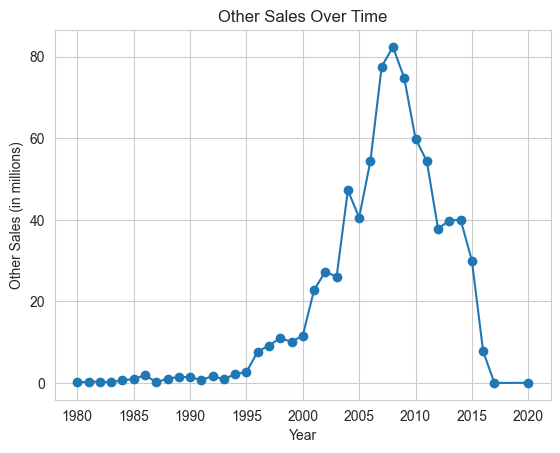

In [16]:
# Example: Trends in other sales over time

yearly_sales = data.groupby('Year')['Other_Sales'].sum()
plt.plot(yearly_sales.index, yearly_sales.values, marker='o')
plt.title('Other Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Other Sales (in millions)')
plt.grid(True)
plt.show()


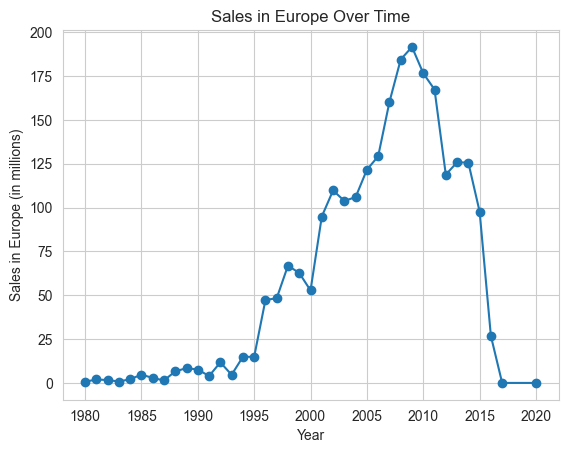

In [17]:
# Example: Trends in Sales in europe over time

yearly_sales = data.groupby('Year')['EU_Sales'].sum()
plt.plot(yearly_sales.index, yearly_sales.values, marker='o')
plt.title('Sales in Europe Over Time')
plt.xlabel('Year')
plt.ylabel('Sales in Europe (in millions)')
plt.grid(True)
plt.show()

## Grouping and Aggregation
Calculating statistics within groups defined by categorical variables (Platform, Genre, Publisher) to compare subsets of data.

In [18]:
# Average global sales by genre

genre_sales = data.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)
print(genre_sales)


Genre
Platform        0.947577
Shooter         0.800468
Role-Playing    0.628456
Racing          0.593273
Sports          0.568247
Fighting        0.531160
Action          0.529942
Misc            0.468488
Simulation      0.459882
Puzzle          0.424930
Strategy        0.258612
Adventure       0.184137
Name: Global_Sales, dtype: float64


In [19]:
# Average global sales by Publisher

Publisher_sales = data.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False)
print(Publisher_sales)

Publisher
Palcom                   4.170000
Red Orb                  2.620000
Nintendo                 2.563836
Arena Entertainment      2.360000
UEP Systems              2.250000
                           ...   
Ascaron Entertainment    0.010000
Otomate                  0.010000
Ongakukan                0.010000
Michaelsoft              0.010000
Paradox Development      0.010000
Name: Global_Sales, Length: 576, dtype: float64


In [20]:
# Average global sales by Platform

Platform_sales = data.groupby('Platform')['Global_Sales'].mean().sort_values(ascending=False)
print(Platform_sales)

Platform
GB      2.622887
NES     2.561939
GEN     1.050370
SNES    0.837029
PS4     0.827679
X360    0.785737
2600    0.746293
PS3     0.728029
Wii     0.705279
N64     0.690538
XOne    0.662254
PS      0.611766
PS2     0.579906
WiiU    0.572448
3DS     0.493527
GBA     0.388830
DS      0.384284
GC      0.363727
XB      0.313935
SCD     0.311667
DC      0.307115
PC      0.271535
PSP     0.243701
WS      0.236667
SAT     0.194162
PSV     0.150244
NG      0.120000
TG16    0.080000
GG      0.040000
3DO     0.033333
PCFX    0.030000
Name: Global_Sales, dtype: float64


## Answering some questions using Data Visulization 

### 1. What genre games have been made the most?

In [21]:
data['Genre'].value_counts()

Genre
Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

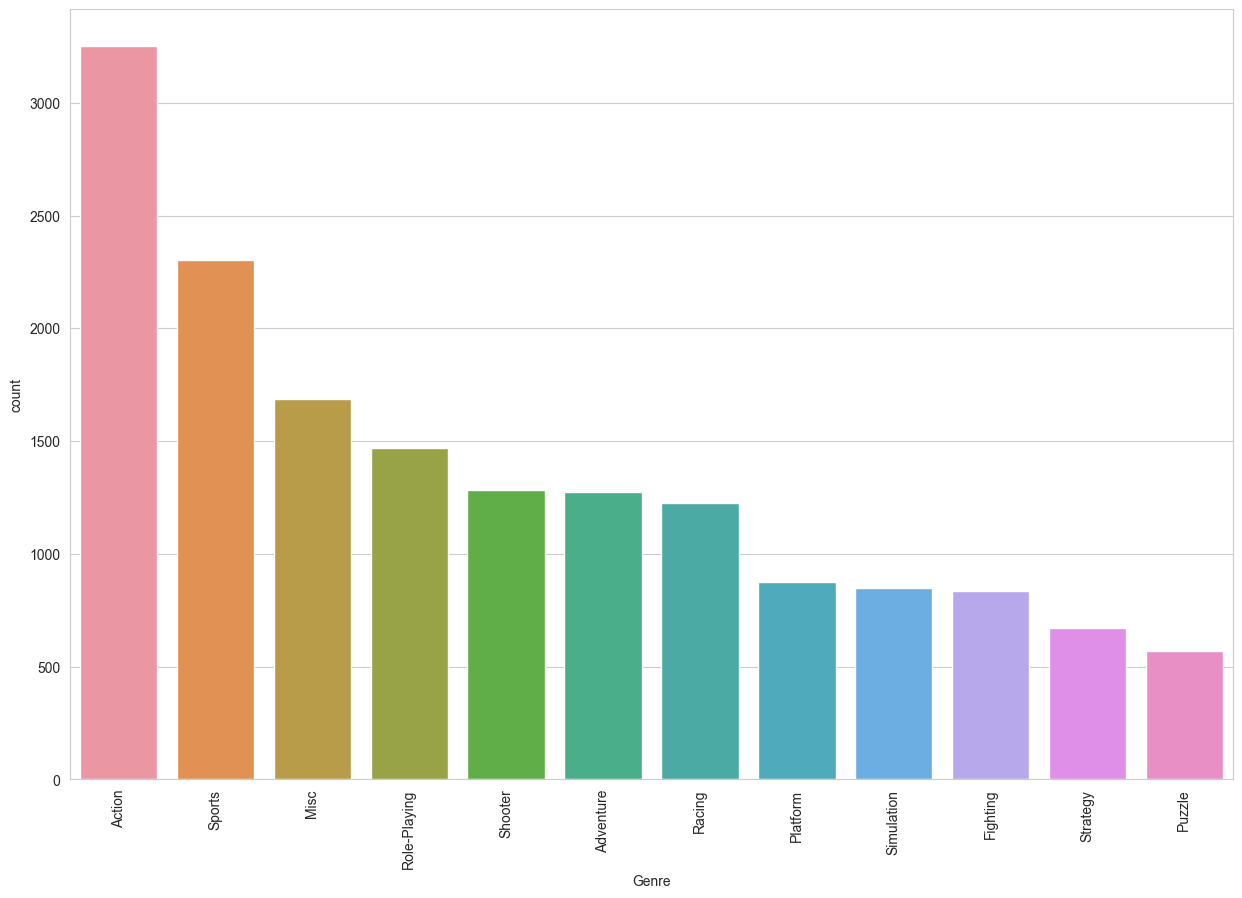

In [22]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=data, order = data['Genre'].value_counts().index)
plt.xticks(rotation=90)

As we can see,In action 3251 and in sports 2304 games was made.

### 2. Which year had the most game release?

In [23]:
year_counts = data.groupby('Year')['Name'].count().sort_values(ascending=False)
print(year_counts)


Year
2009.0    1431
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
2006.0    1008
2005.0     936
2002.0     829
2003.0     775
2004.0     744
2012.0     655
2015.0     614
2014.0     580
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     342
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Name, dtype: int64


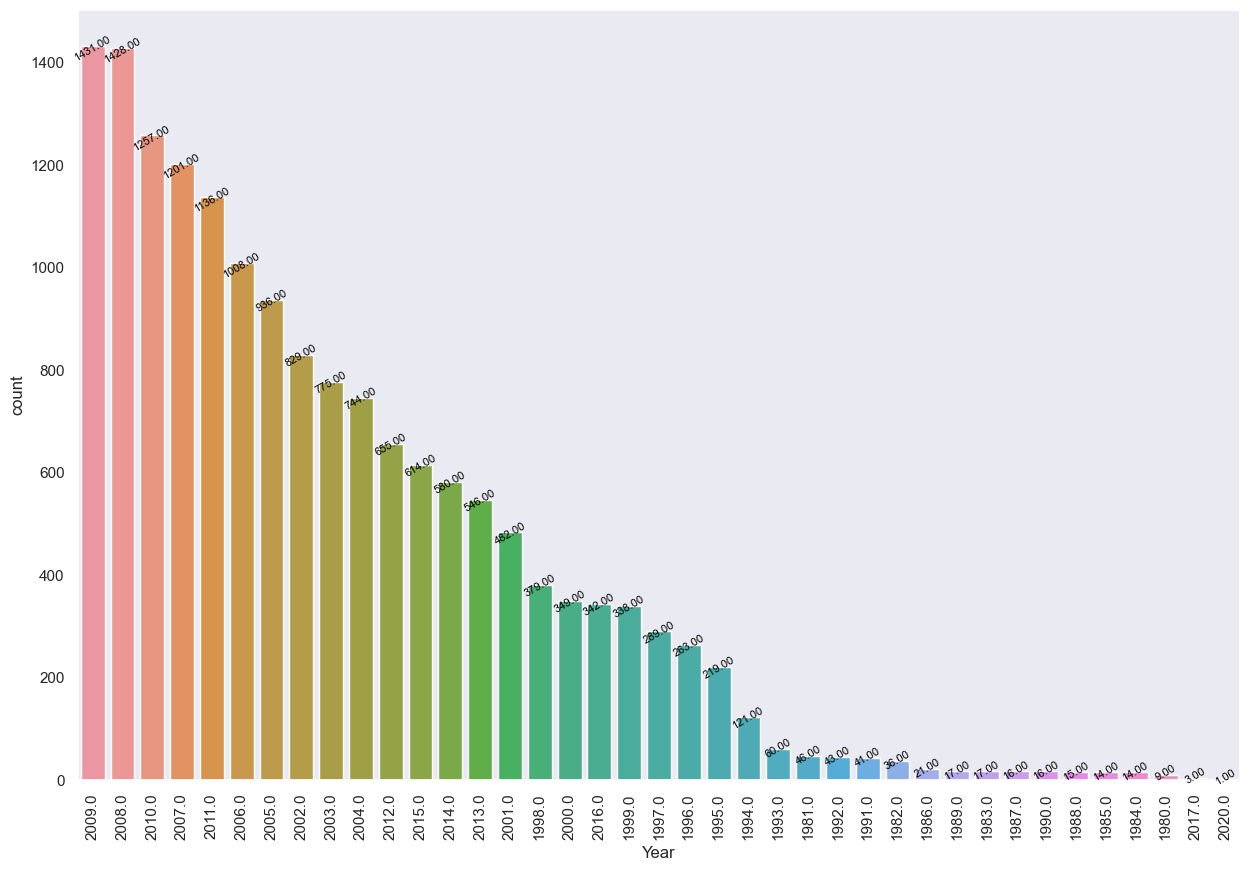

In [59]:
plt.figure(figsize=(15, 10))
cnt_plot =sns.countplot(x="Year", data=data, order = data.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
for p in cnt_plot.patches:
    cnt_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'top', 
                      xytext = (0, 9), 
                      textcoords = 'offset points',
                      fontsize=8, color='black',rotation=30)

plt.show()

Ans =>
Year
1. 2009 =   1431
2. 
200 0=   14883. 
20 0 0   5754. 7
2 0=.01201
5. 15)2 0   1136201


### 3. Show Top 5 years games release by genre ?


<Figure size 3000x1000 with 0 Axes>

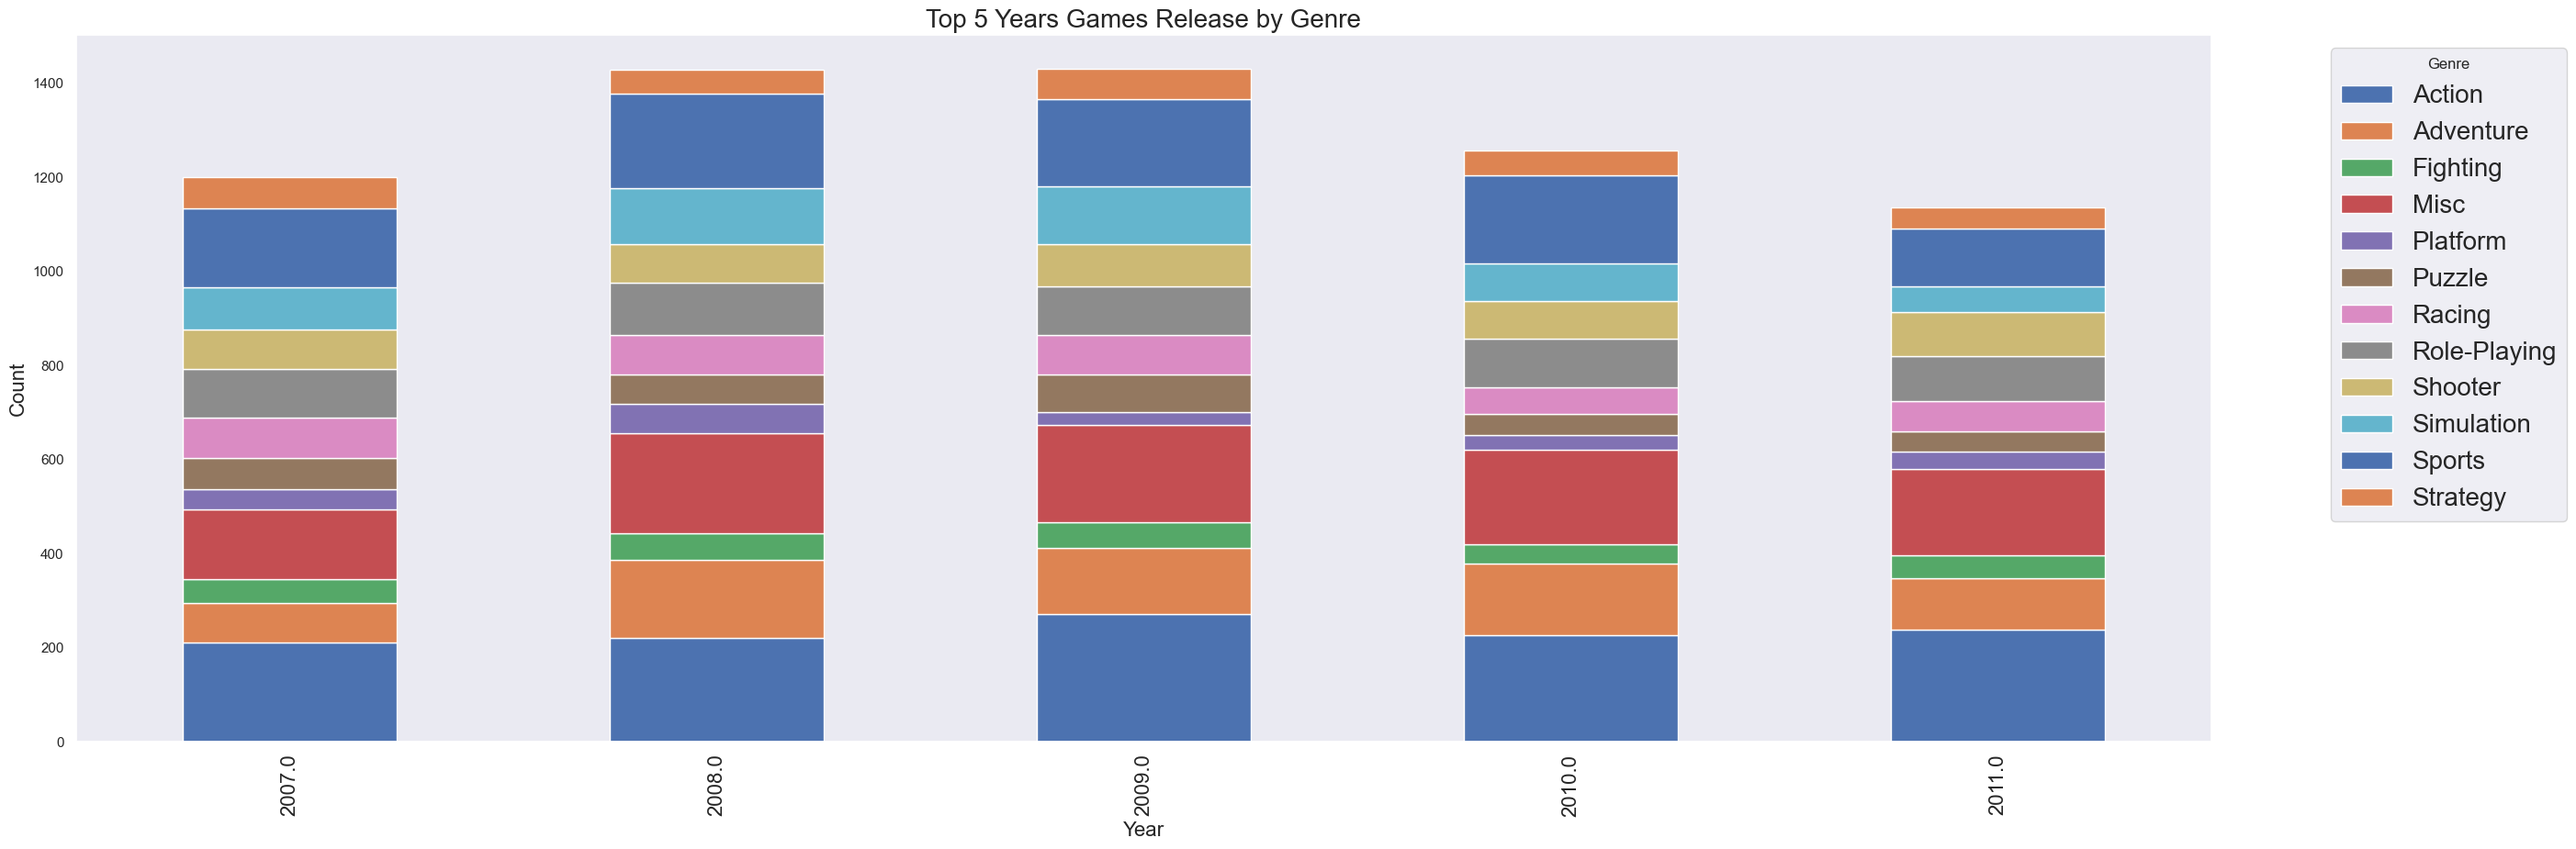

In [56]:
plt.figure(figsize=(30, 10))

# Get the top 5 years with the most game releases
top_years = data['Year'].value_counts().iloc[:5].index

# Filter the data for the top 5 years
filtered_data = data[data['Year'].isin(top_years)]

# Create a crosstab of Year and Genre
crosstab = pd.crosstab(filtered_data['Year'], filtered_data['Genre'])

# Plot the stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(30, 10))

plt.xticks(size=16, rotation=90)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Top 5 Years Games Release by Genre', fontsize=20)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
plt.show()


### 4. Which year had the highest sales worldwide?¶

In [26]:
data_year = data.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()

In [27]:
data_year

,Year,Global_Sales
0,1980.0,11.38
1,1981.0,35.77
2,1982.0,28.86
3,1983.0,16.79
4,1984.0,50.36
5,1985.0,53.94
6,1986.0,37.07
7,1987.0,21.74
8,1988.0,47.22
9,1989.0,73.45


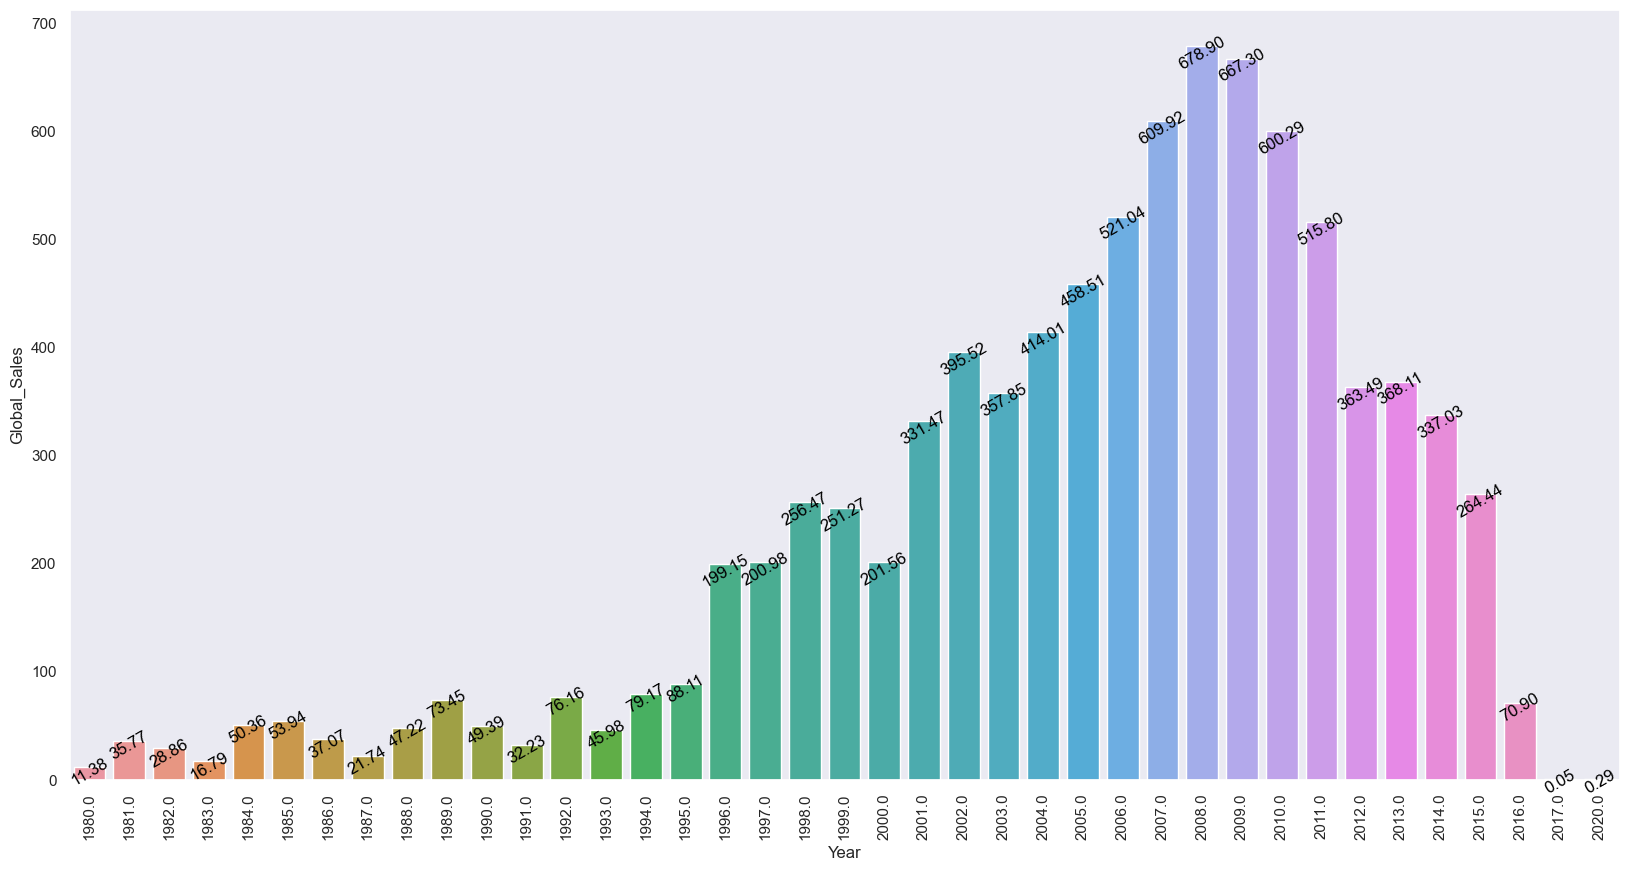

In [52]:
plt.figure(figsize=(20, 10))
bar_plot2 = sns.barplot(x="Year", y="Global_Sales", data=data_year)
plt.xticks(rotation=90)
for p in bar_plot2.patches:
    bar_plot2.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'top', 
                      xytext = (0, 9), 
                      textcoords = 'offset points',
                      fontsize=12, color='black',rotation=30)

plt.show()

Ans:-
1. 2008 = 678
2. 2009	= 667
3. 2007	= 609
4. 2010 = 600
5. 	2000= 	524

### 5. Which genre game has been released the most in a single year?

In [29]:
year_max_df = data.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)

C:\Users\CHIRAG\AppData\Local\Temp\ipykernel_17940\3535016425.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']


In [30]:
genre = year_max_genre['Genre'].values

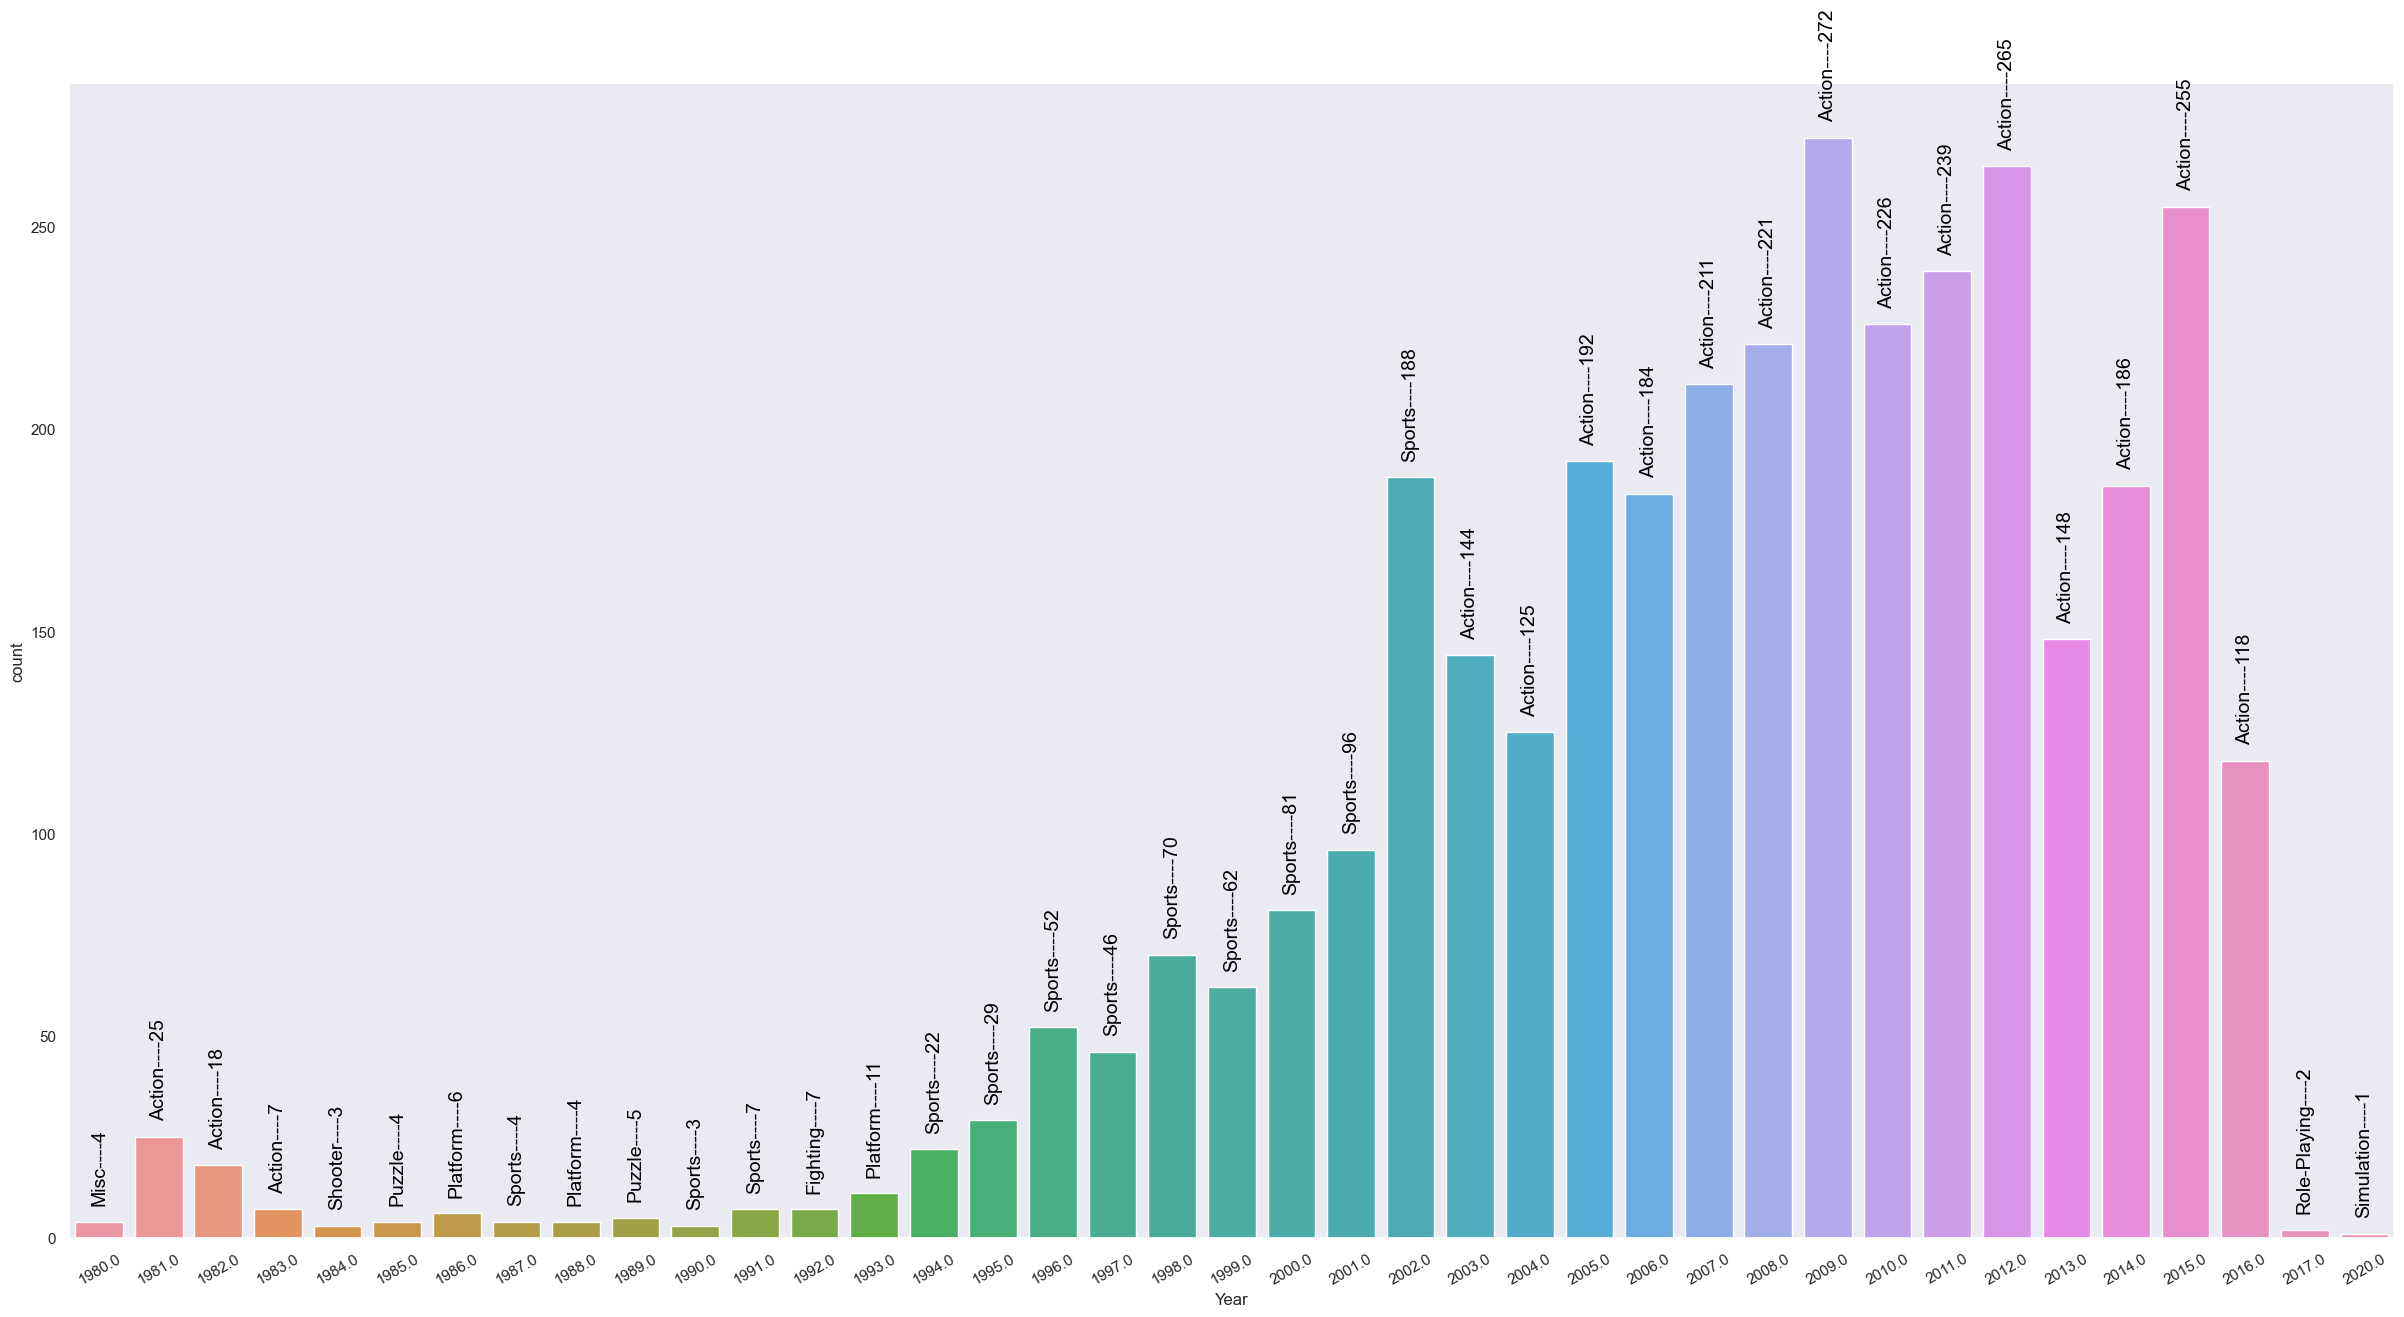

In [51]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:

    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1




plt.xticks(rotation=30)
plt.show()

Answer is => 2009 Action ---> 272 and 2012 Action ---> 265 games are release.

### 6. which genre game have the highest sale price globally ?

In [32]:
data_genre = data.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)
data_genre

,Genre,Global_Sales
0,Action,1722.84
10,Sports,1309.24
8,Shooter,1026.20
7,Role-Playing,923.83
4,Platform,829.13
3,Misc,789.87
6,Racing,726.76
2,Fighting,444.05
9,Simulation,389.98
5,Puzzle,242.21


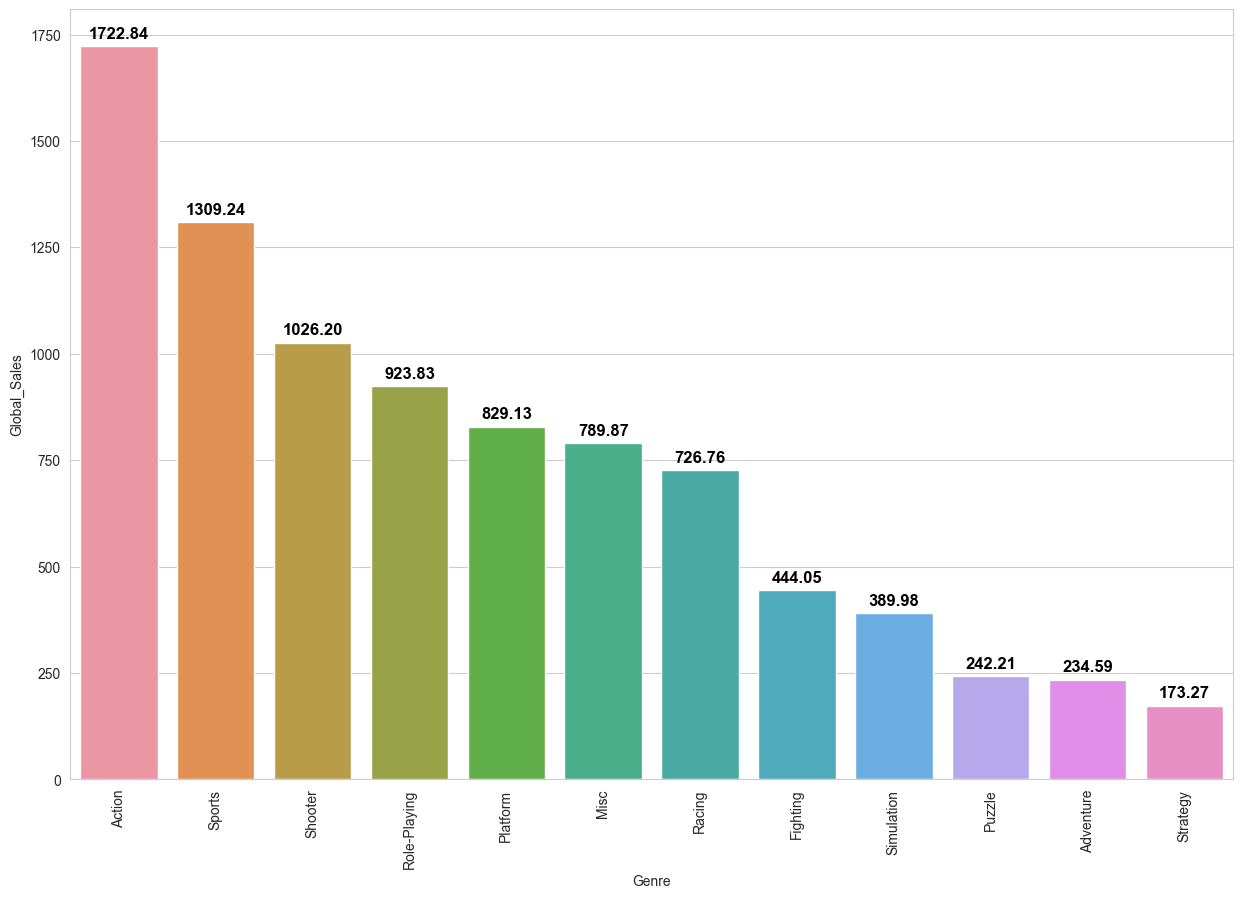

In [33]:
plt.figure(figsize=(15, 10))
bar_plot1 = sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(rotation=90)
for p in bar_plot1.patches:
    bar_plot1.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points',
                      fontsize=12, color='black', weight='bold')

plt.show()

Answer is Action , sports and shooter.


### 9. Which individual game have the highest sale price globally?

In [34]:
top_game_sale = data.head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)
top_game_sale

,Name,Year,Genre,Global_Sales
0,Wii Sports,2006.0,Sports,82.74
1,Super Mario Bros.,1985.0,Platform,40.24
2,Mario Kart Wii,2008.0,Racing,35.82
3,Wii Sports Resort,2009.0,Sports,33.00
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,31.37
5,Tetris,1989.0,Puzzle,30.26
6,New Super Mario Bros.,2006.0,Platform,30.01
7,Wii Play,2006.0,Misc,29.02
8,New Super Mario Bros. Wii,2009.0,Platform,28.62
9,Duck Hunt,1984.0,Shooter,28.31


In [35]:
name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)

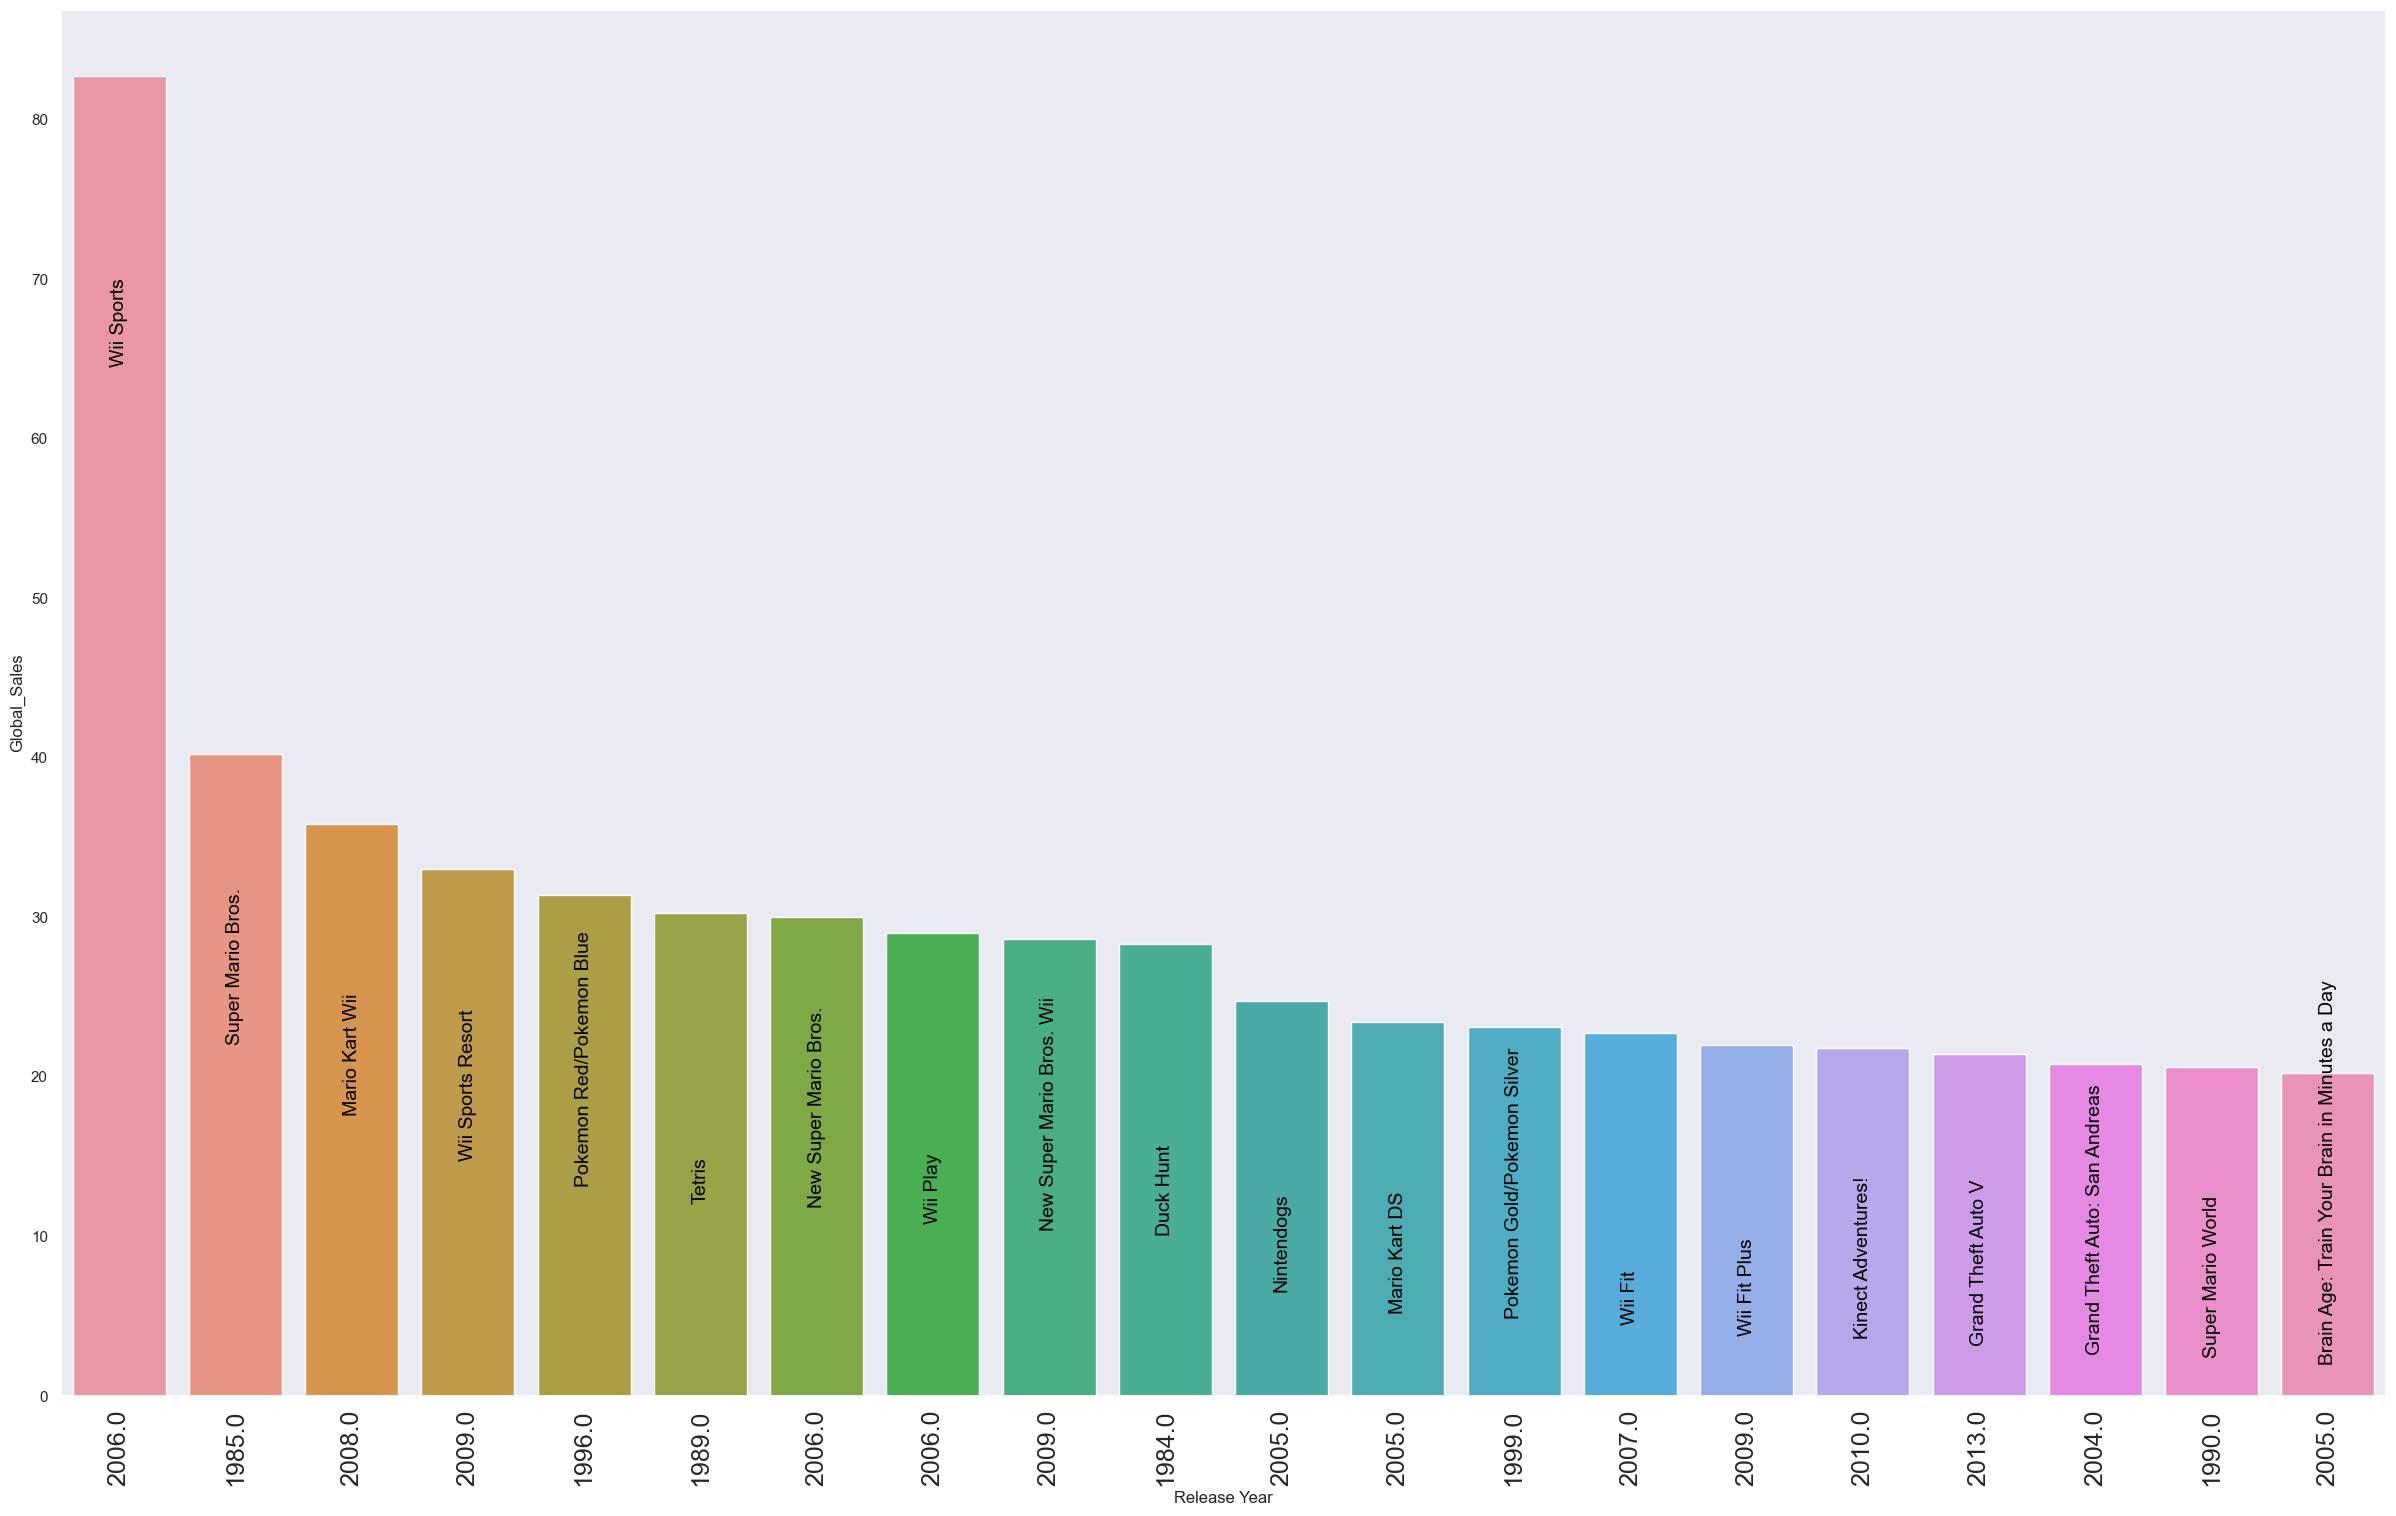

In [61]:
plt.figure(figsize=(30, 18))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)
index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year'], fontsize=18, rotation=90)
plt.xlabel('Release Year')
plt.show()

Answer is Wii sports.

### 10. Sales compearison by genre

In [37]:
comp_genre = data[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']]
# comp_genre
comp_map = comp_genre.groupby(by=['Genre']).sum()
# comp_map

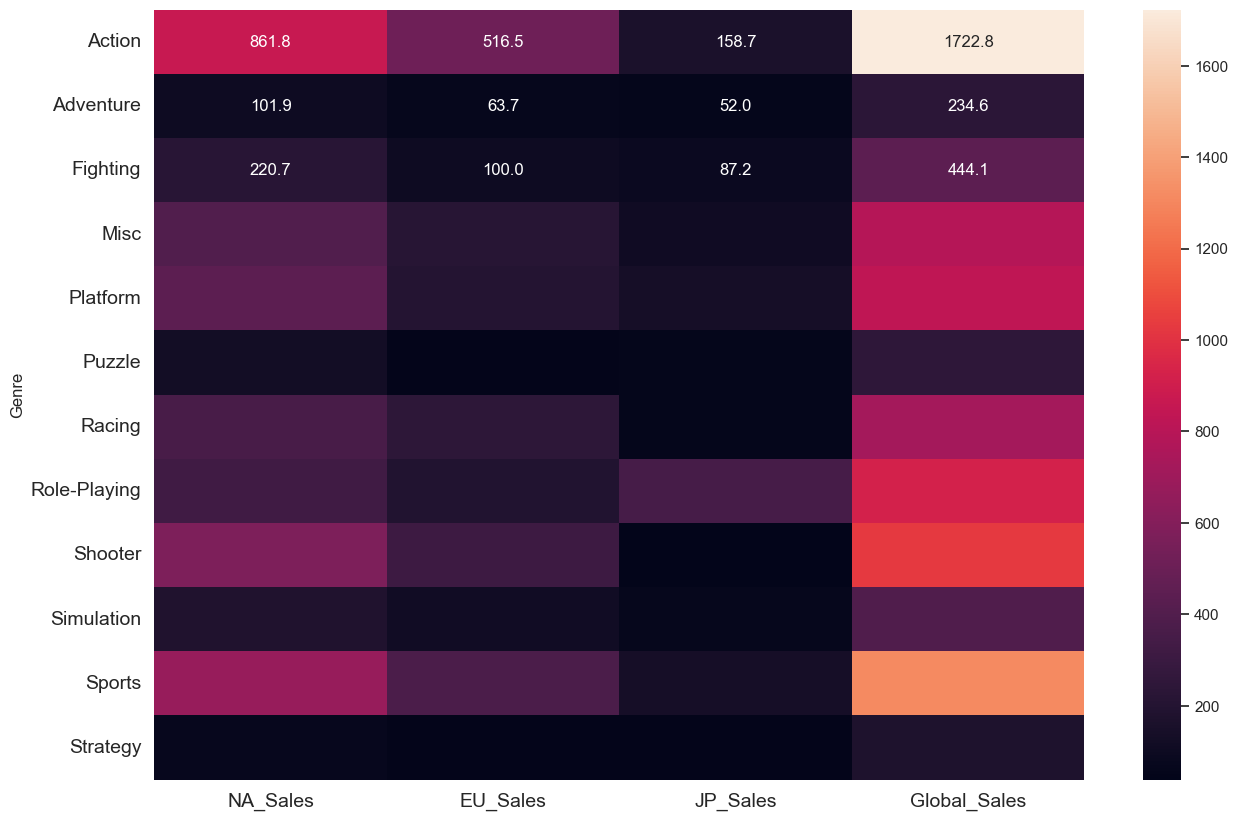

In [38]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1)
sns.heatmap(comp_map, annot=True, fmt = '.1f')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### 11. What is total revenue by region? And which region has the highest sales?

In [39]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4327.65
1,EU_Sales,2406.69
2,JP_Sales,1284.27
3,Other_Sales,788.91


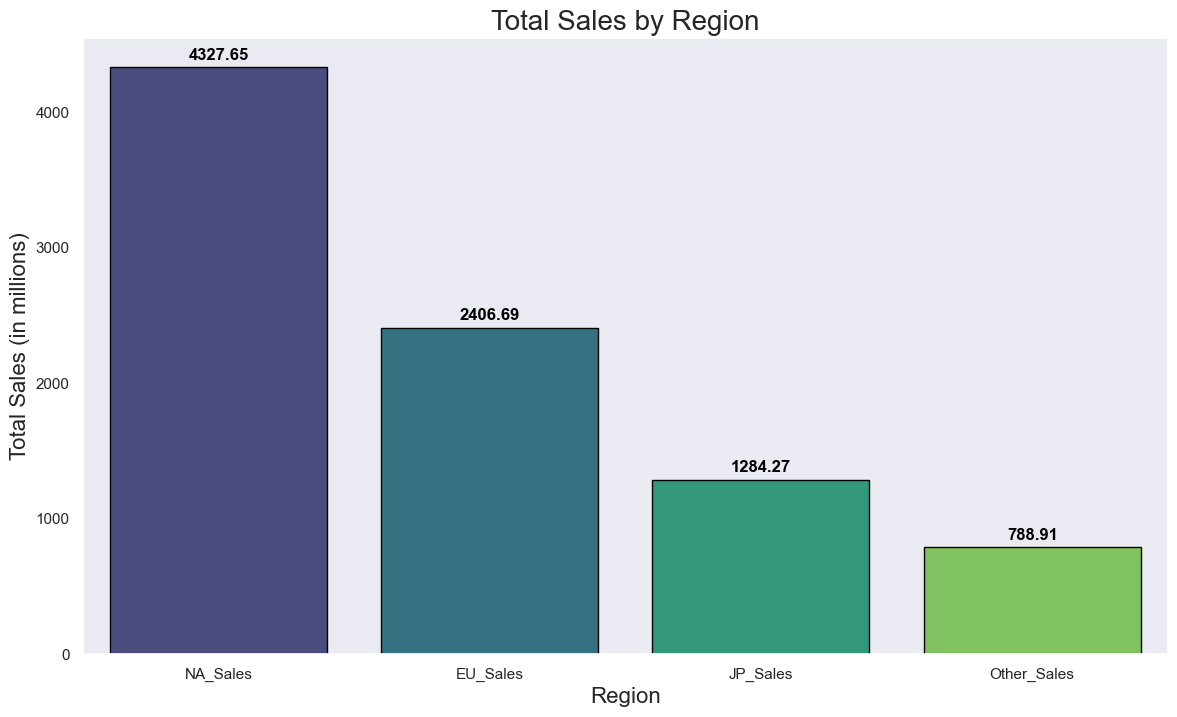

In [40]:
# Setting the aesthetic style
sns.set(style="dark")
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='region', y='sale', data=top_sale_reg, palette="viridis", edgecolor='black')
plt.title('Total Sales by Region', fontsize=20)
plt.xlabel('Region', fontsize=16)
plt.ylabel('Total Sales (in millions)', fontsize=16)

# Adding data labels to each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points',
                      fontsize=12, color='black', weight='bold')


plt.show()


Ans:- NA (North America) has the highest sales among other sales i.e.4327.

#### Pie chart visulization for percente wise sales distribution

In [41]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']

([<matplotlib.patches.Wedge at 0x19f0a276790>,
 [Text(-1.0995946696115964, 0.029859044890360037, 'NA_Sales'),
  Text(0.7922706574673692, -0.7630905616741847, 'EU_Sales'),
  Text(0.9378314250625531, 0.5748671308790761, 'JP_Sales'),
  Text(0.30547029027007794, 1.056734546497991, 'Other_Sales')],
 [Text(-0.5997789106972343, 0.0162867517583782, '49.1%'),
  Text(0.4321476313458377, -0.4162312154586461, '27.3%'),
  Text(0.5115444136704835, 0.3135638895704051, '14.6%'),
  Text(0.1666201583291334, 0.5764006617261768, '9.0%')])

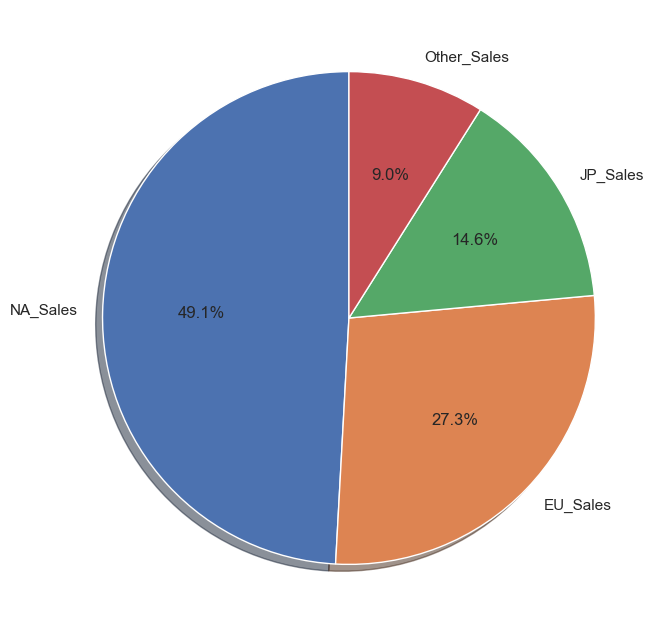

In [42]:

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)